
# Heart study 

data were obtained from https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset, with License 
CC0: PublicDomain

This study is only to demonstrate how to work with data using the pandas and matplotlib.pyplot libraries in python. The results of the study have no predictive value.

Date: 14.01.2024*


-------------------------------------------------------------------------------------------------------------
importing libraries and data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("dataset/heart.csv")

### General look at dataframe

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [6]:
# dropping unanalysed data 

df.drop(columns=[ 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'], inplace=True)

In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000


In [8]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg
0,63,1,3,145,233,1,0
1,37,1,2,130,250,0,1
2,41,0,1,130,204,0,0
3,56,1,1,120,236,0,1
4,57,0,0,120,354,0,1


In [9]:
df.dtypes

age        int64
sex        int64
cp         int64
trtbps     int64
chol       int64
fbs        int64
restecg    int64
dtype: object

In [10]:
# check if there are not NaN values

all(df.notna())

True

In [11]:
# double-check if there are not NaN values

rows_with_nan = df[df.isna().any(axis=1)]
rows_with_nan.empty

True

### Age distribution a Cholesterol values

First graph shows an age distribution in give data sample. In second part is ploted the relationship between age and cholesterol levels

([], [])

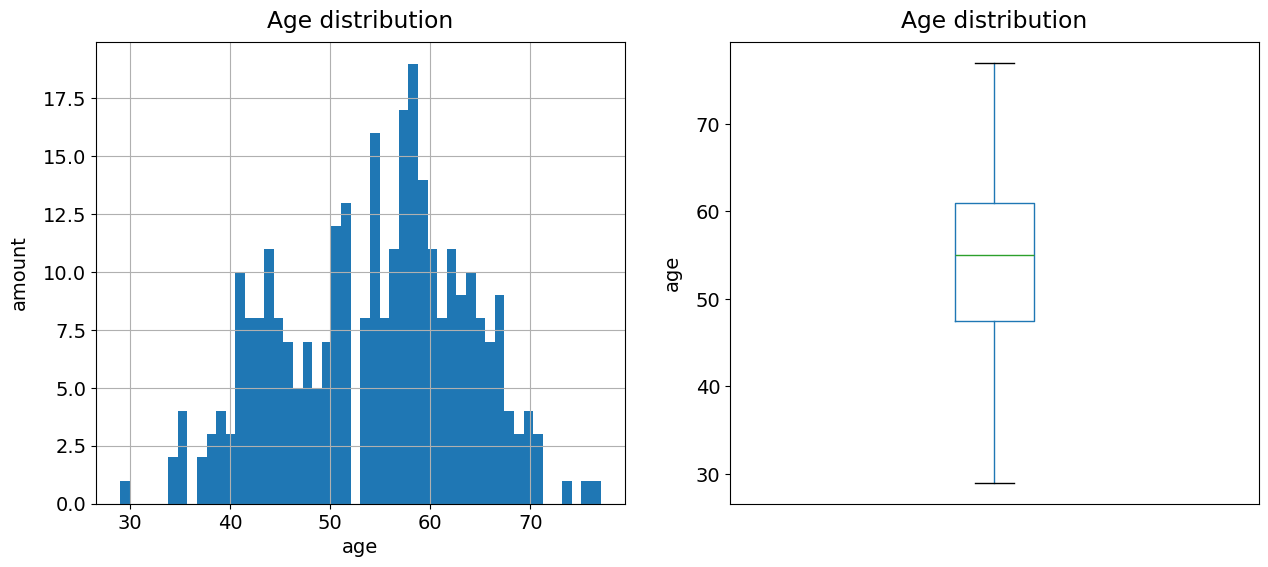

In [83]:
# age distribution
plt.figure(figsize=(15,6))

plt.subplot(121)
df.age.hist(bins=50)
plt.title("Age distribution",pad=10)
plt.ylabel("amount", labelpad=10)
plt.xlabel("age")

plt.subplot(122)
df.boxplot("age")
plt.grid(False)
plt.title("Age distribution",pad=10)
plt.ylabel("age", labelpad=10)
plt.xticks([])

Conclusion: The main part of people attended in this research was in range between 47.5 and 61 years 

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
chol,204.0,196.0,213.75,232.5,193.666667,239.75,196.333333,220.7,246.75,256.75,...,279.0,245.714286,286.777778,238.75,242.333333,252.5,238.666667,269.0,197.0,304.0


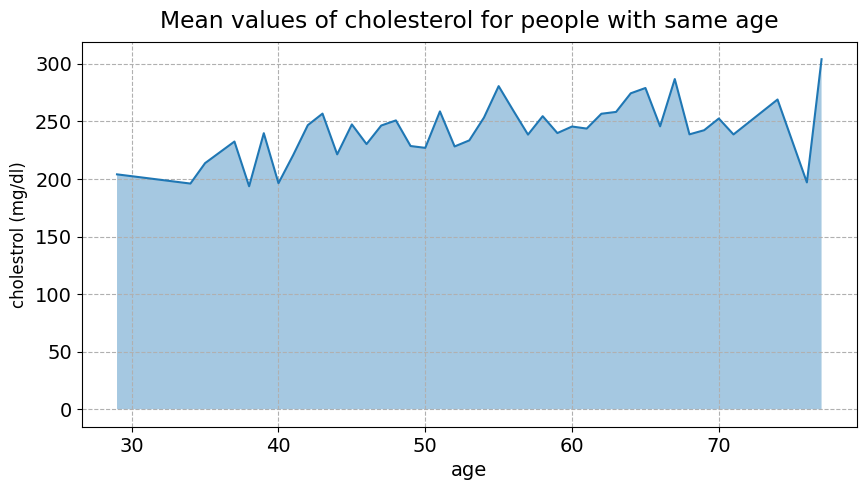

In [43]:
df_age_chol = df.groupby("age")["chol"].mean().to_frame()

plt.fill_between(df_age_chol.index, df_age_chol.chol, alpha=0.4, linestyle="solid")
plt.plot(df_age_chol.index, df_age_chol.chol)
plt.grid(True, linestyle="--")
plt.title("Mean values of cholesterol for people with same age", pad=10)
plt.ylabel("cholestrol (mg/dl)", labelpad=5, fontsize=12)
plt.xlabel("age")

df_age_chol.transpose() 

In [14]:
oldest_person = df["age"].max()
youngest_person = df["age"].min()
df.loc[(df["age"] == oldest_person) | (df["age"] == youngest_person),:]

,age,sex,cp,trtbps,chol,fbs,restecg
72,29,1,1,130,204,0,0
238,77,1,0,125,304,0,0


Text(0.5, 1.0, 'Distribution of people with certain type of chest pain')

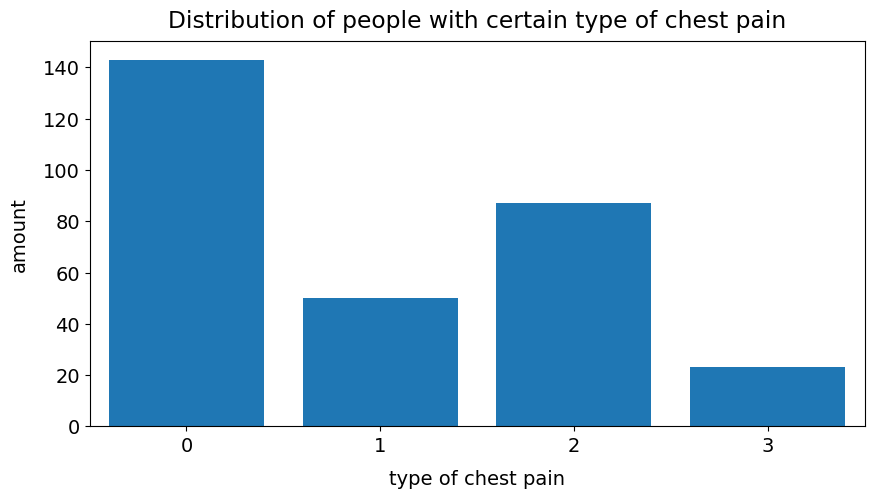

In [69]:
df.cp.hist()

chest_pain = df.groupby("cp").count()
plt.bar(chest_pain.index, chest_pain.age.values)
plt.grid(False) 
plt.xticks([0,1,2,3])
plt.xlim(-0.5,3.5)
plt.ylabel("amount", labelpad=10)
plt.xlabel("type of chest pain", labelpad=10)
plt.title("Distribution of people with certain type of chest pain", pad=10)

### Creating a specific groups of people, delimited by 10 years.

In [15]:
group_of_twenty_year_olds = df.loc[(df.age.between(20,29)), :].sort_values(by="age").groupby("age").mean()
group_of_thirty_year_olds = df.loc[(df.age.between(30,39)), :].sort_values(by="age").groupby("age").mean()
group_of_fourty_year_olds = df.loc[(df.age.between(40,49)), :].sort_values(by="age").groupby("age").mean()
group_of_fifty_year_olds = df.loc[(df.age.between(50,59)), :].sort_values(by="age").groupby("age").mean()
group_of_sixty_year_olds = df.loc[(df.age.between(60,69)), :].sort_values(by="age").groupby("age").mean()
group_of_seventy_year_olds = df.loc[(df.age.between(70,79)), :].sort_values(by="age").groupby("age").mean()

Text(0.5, 1.0, 'Group of 70<80 year-olds people')

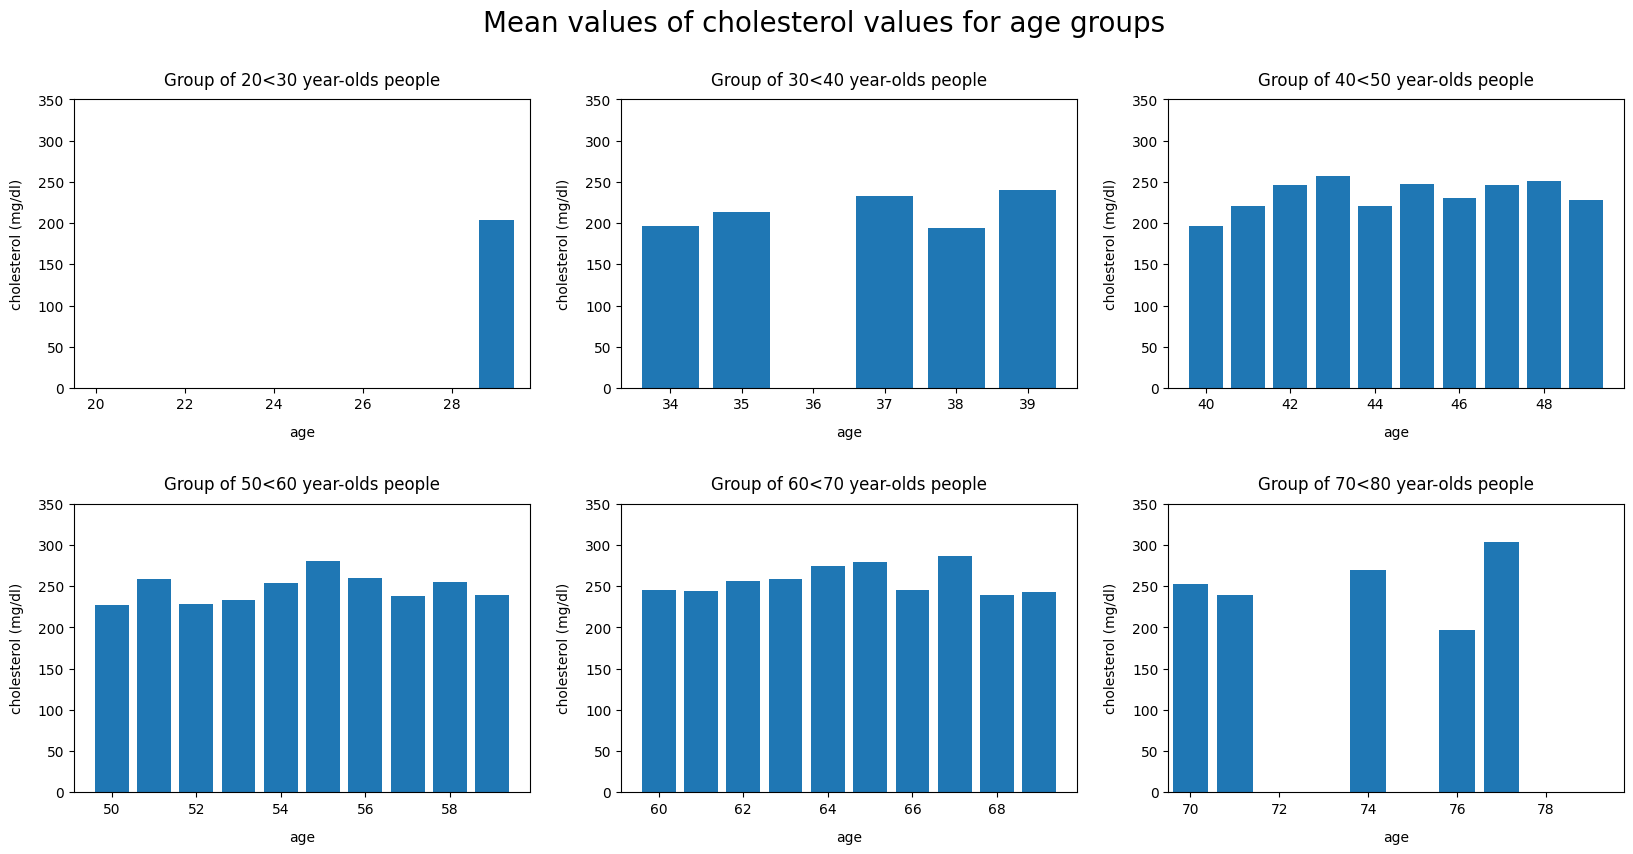

In [16]:
plt.figure(figsize=(20,9))
plt.suptitle("Mean values of cholesterol values for age groups", fontsize=20)

plt.subplot(231)
plt.bar(group_of_twenty_year_olds.index, group_of_twenty_year_olds.chol.values)
plt.xlim(19.5,29.75)
plt.ylim(0,350)
plt.xlabel("age", labelpad=10)
plt.ylabel("cholesterol (mg/dl)", labelpad=10)
plt.title("Group of 20<30 year-olds people", pad=10)


plt.subplot(232)
plt.bar(group_of_thirty_year_olds.index, group_of_thirty_year_olds.chol.values)
plt.ylim(0,350)
plt.xlabel("age", labelpad=10)
plt.ylabel("cholesterol (mg/dl)", labelpad=10)
plt.title("Group of 30<40 year-olds people", pad=10)


plt.subplot(233)
plt.bar(group_of_fourty_year_olds.index, group_of_fourty_year_olds.chol.values)
plt.ylim(0,350)
plt.xlabel("age", labelpad=10)
plt.ylabel("cholesterol (mg/dl)", labelpad=10)
plt.title("Group of 40<50 year-olds people", pad=10)

plt.subplots_adjust(hspace=0.4) #spacing

plt.subplot(234)
plt.bar(group_of_fifty_year_olds.index, group_of_fifty_year_olds.chol.values)
plt.ylim(0,350)
plt.xlabel("age", labelpad=10)
plt.ylabel("cholesterol (mg/dl)", labelpad=10)
plt.title("Group of 50<60 year-olds people", pad=10)


plt.subplot(235)
plt.bar(group_of_sixty_year_olds.index, group_of_sixty_year_olds.chol.values)
plt.ylim(0,350)
plt.xlabel("age", labelpad=10)
plt.ylabel("cholesterol (mg/dl)", labelpad=10)
plt.title("Group of 60<70 year-olds people", pad=10)


plt.subplot(236)
plt.bar(group_of_seventy_year_olds.index, group_of_seventy_year_olds.chol.values)
plt.ylim(0,350)
plt.xlim(69.5,79.75)
plt.xlabel("age", labelpad=10)
plt.ylabel("cholesterol (mg/dl)", labelpad=10)
plt.title("Group of 70<80 year-olds people", pad=10)


Text(0.5, 1.0, 'Group of 70<80 year-olds people')

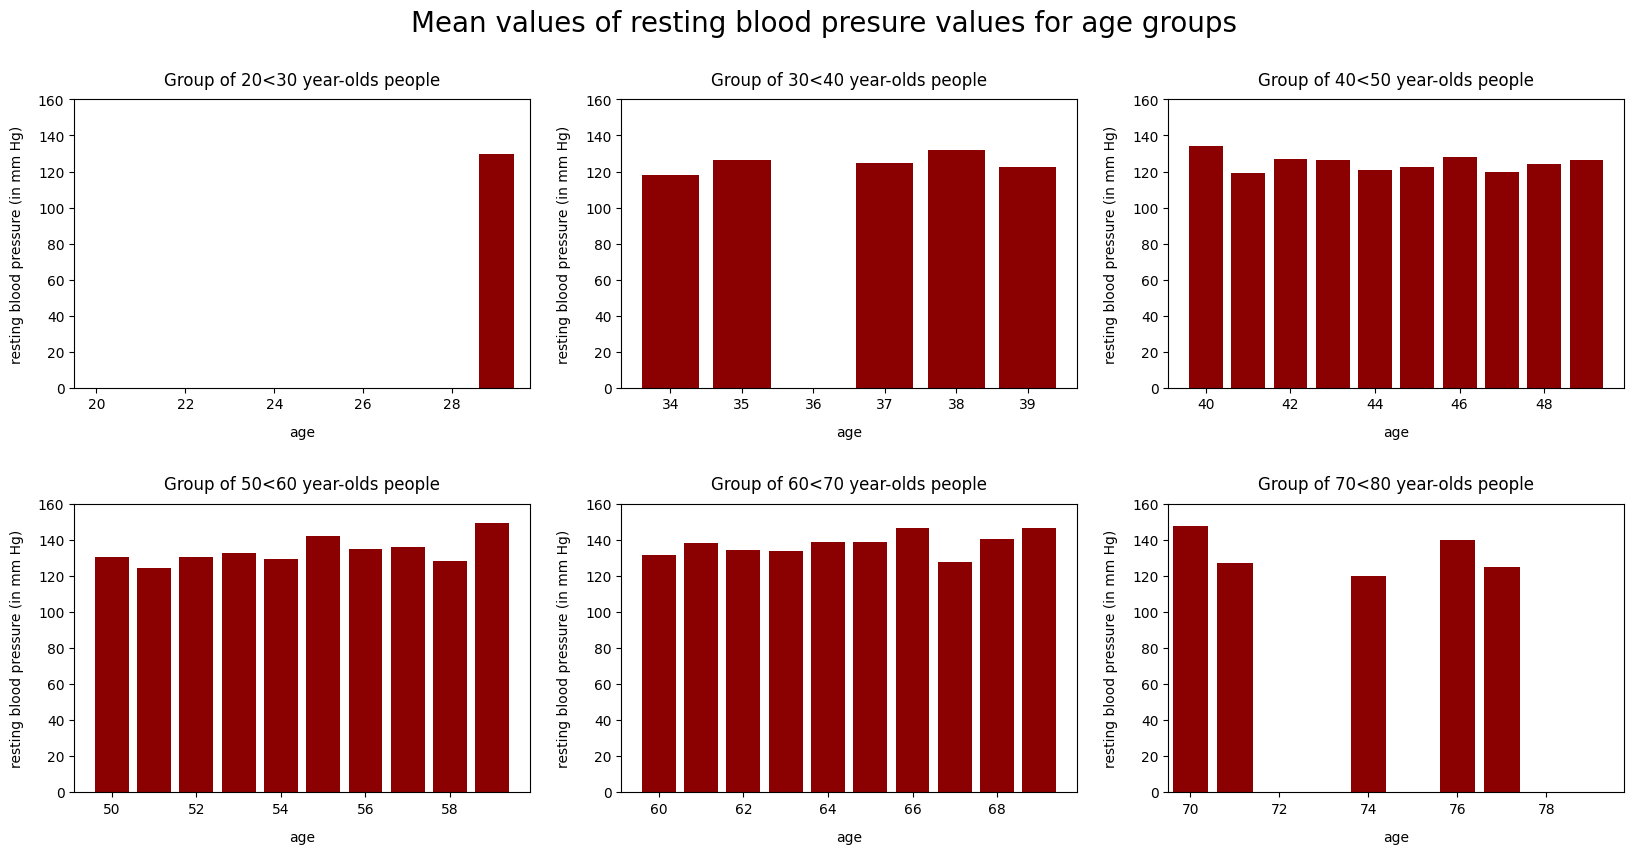

In [17]:
plt.figure(figsize=(20,9))
plt.suptitle("Mean values of resting blood presure values for age groups", fontsize=20)

plt.subplot(231)
plt.bar(group_of_twenty_year_olds.index, group_of_twenty_year_olds.trtbps.values, color="darkred")
plt.xlim(19.5,29.75)
plt.ylim(0,160)
plt.xlabel("age", labelpad=10)
plt.ylabel("resting blood pressure (in mm Hg)", labelpad=10)
plt.title("Group of 20<30 year-olds people", pad=10)


plt.subplot(232)
plt.bar(group_of_thirty_year_olds.index, group_of_thirty_year_olds.trtbps.values, color="darkred")
plt.ylim(0,160)
plt.xlabel("age", labelpad=10)
plt.ylabel("resting blood pressure (in mm Hg)", labelpad=10)
plt.title("Group of 30<40 year-olds people", pad=10)


plt.subplot(233)
plt.bar(group_of_fourty_year_olds.index, group_of_fourty_year_olds.trtbps.values, color="darkred")
plt.ylim(0,160)
plt.xlabel("age", labelpad=10)
plt.ylabel("resting blood pressure (in mm Hg)", labelpad=10)
plt.title("Group of 40<50 year-olds people", pad=10)

plt.subplots_adjust(hspace=0.4) #spacing

plt.subplot(234)
plt.bar(group_of_fifty_year_olds.index, group_of_fifty_year_olds.trtbps.values, color="darkred")
plt.ylim(0,160)
plt.xlabel("age", labelpad=10)
plt.ylabel("resting blood pressure (in mm Hg)", labelpad=10)
plt.title("Group of 50<60 year-olds people", pad=10)


plt.subplot(235)
plt.bar(group_of_sixty_year_olds.index, group_of_sixty_year_olds.trtbps.values, color="darkred")
plt.ylim(0,160)
plt.xlabel("age", labelpad=10)
plt.ylabel("resting blood pressure (in mm Hg)", labelpad=10)
plt.title("Group of 60<70 year-olds people", pad=10)


plt.subplot(236)
plt.bar(group_of_seventy_year_olds.index, group_of_seventy_year_olds.trtbps.values, color="darkred")
plt.ylim(0,160)
plt.xlim(69.5,79.75)
plt.xlabel("age", labelpad=10)
plt.ylabel("resting blood pressure (in mm Hg)", labelpad=10)
plt.title("Group of 70<80 year-olds people", pad=10)


# The most represented age sample

In this part of study is identified the most represented age group. For these age sample is monitored an cholestrol representation, also the lowest and the highest value is found. 

In [18]:
df.age.value_counts().to_frame().head()

,count
age,
58,19
57,17
54,16
59,14
52,13


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,age,sex,cp,trtbps,chol,fbs,restecg
0,58,0,0,130,197,0,1
1,58,1,2,140,211,1,0
2,58,1,0,128,216,0,0
3,58,1,0,146,218,0,1
4,58,1,1,125,220,0,1
5,58,1,2,132,224,0,0
6,58,0,0,170,225,1,0
7,58,1,2,112,230,0,0
8,58,1,0,100,234,0,1
9,58,1,2,105,240,0,0


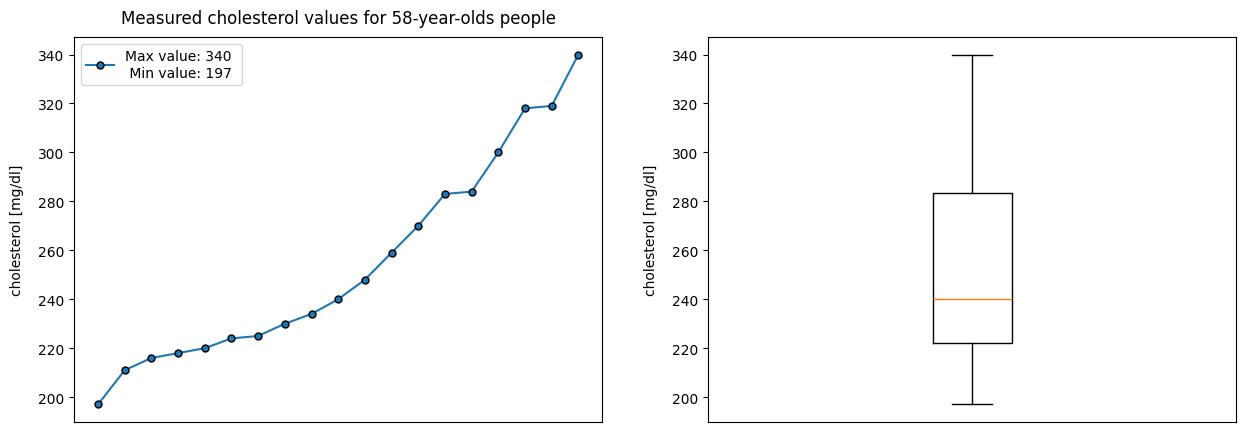

In [19]:
fifty_eight_grp = df.loc[(df.age == 58), :]
max_value = fifty_eight_grp.chol.max()
min_value = fifty_eight_grp.chol.min()
fifty_eight_grp_sorted = fifty_eight_grp.sort_values("chol").reset_index(drop=True)

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(fifty_eight_grp_sorted.index, fifty_eight_grp_sorted.chol.values, linestyle='solid', dash_joinstyle="round" , marker='o', ms=5, mec="blacK")
plt.title("Measured cholesterol values for 58-year-olds people", pad=10)
plt.xticks([], [])
plt.legend().set_visible(False)
plt.ylabel('cholesterol [mg/dl]', labelpad=10)
plt.legend([f"Max value: {max_value} \n Min value: {min_value}"])

plt.subplot(122)
plt.boxplot(fifty_eight_grp_sorted.chol)
plt.legend().set_visible(False)
plt.ylabel('cholesterol [mg/dl]', labelpad=10)
plt.xticks([], [])

fifty_eight_grp_sorted


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,age,sex,cp,trtbps,chol,fbs,restecg
0,58,0,0,100,248,0,0
1,58,1,0,100,234,0,1
2,58,1,2,105,240,0,0
3,58,1,2,112,230,0,0
4,58,1,0,114,318,0,2
5,58,0,2,120,340,0,1
6,58,1,1,120,284,0,0
7,58,1,1,125,220,0,1
8,58,1,0,125,300,0,0
9,58,1,0,128,216,0,0


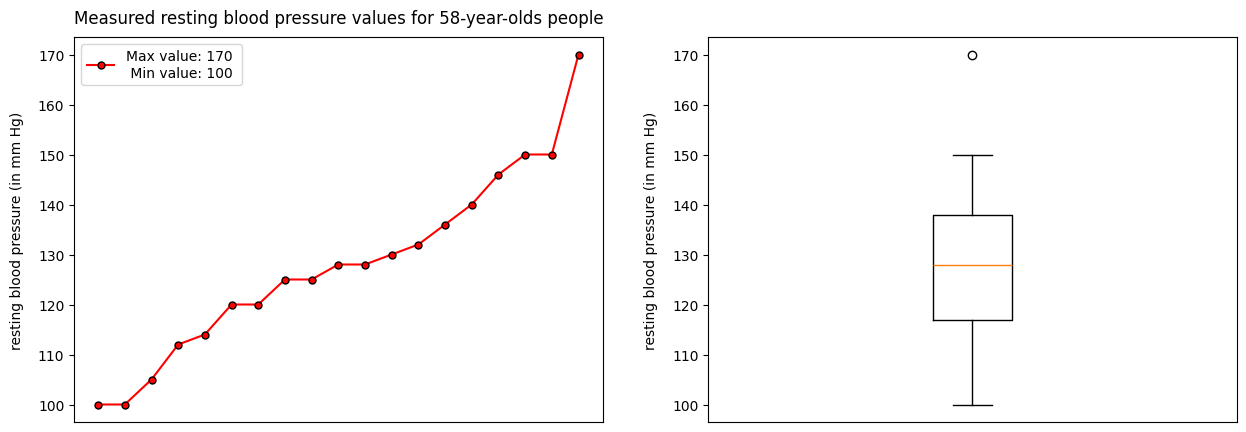

In [20]:
fifty_eight_grp = df.loc[(df.age == 58), :]
max_value = fifty_eight_grp.trtbps.max()
min_value = fifty_eight_grp.trtbps.min()
fifty_eight_grp_sorted = fifty_eight_grp.sort_values("trtbps").reset_index(drop=True)

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(fifty_eight_grp_sorted.index, fifty_eight_grp_sorted.trtbps.values, linestyle='solid', dash_joinstyle="round" ,color="red", marker='o', ms=5, mec="blacK")
plt.title("Measured resting blood pressure values for 58-year-olds people", pad=10)
plt.xticks([], [])
plt.legend().set_visible(False)
plt.ylabel('resting blood pressure (in mm Hg)', labelpad=10)
plt.legend([f"Max value: {max_value} \n Min value: {min_value}"])


plt.subplot(122)
plt.boxplot(fifty_eight_grp_sorted.trtbps)
plt.legend().set_visible(False)
plt.ylabel('resting blood pressure (in mm Hg)', labelpad=10)
plt.xticks([], [])



fifty_eight_grp_sorted


### checking measured values for a pacient with blood presure 170 -> identified as outlayer

In [21]:
df.loc[(df.age == 58) & (df.trtbps == 170), :]

,age,sex,cp,trtbps,chol,fbs,restecg
292,58,0,0,170,225,1,0


1. According to notes provided with datasheet pacient chest paint (cp=0), cp=0 is not desribe in .txt file. A numbering start from value 1 up to value 4 since in datasheet is not greater value than 3 for, it means Value 1 == 0 ... Value 4 == 3. This result describes the pacient has a typical angina. 
2. His cholesterol level is 225 mg/dl, which means his cholesterol is in range 25% below median, in group of 58-year-olds people.
3. Resting electrocardiographic results (rest_ecg) is showing a value 0, which means a normal results.

# Correlation of data

In [23]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000


### Graphical representation of correlation

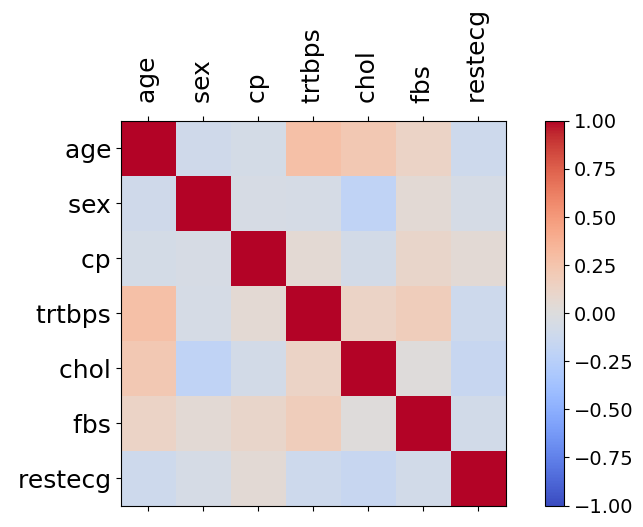

In [26]:
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = 10,5
dic = {"size": 14}
matplotlib.rc('font', **dic)

# Now we plot correlation of attributes
x = df.loc[:,:]
alpha = x.corr().columns
plt.rcParams["axes.grid"] = False

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(x.corr(method='pearson'), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)

plt.xticks(rotation='vertical')
ax.set_xticks(np.arange(len(alpha)))
ax.set_yticks(np.arange(len(alpha)))
ax.set_xticklabels([' ']+alpha)
ax.set_yticklabels([' ']+alpha)
ax.tick_params(labelsize = 18)

In [39]:
significant_correlation = 0.3
mask = df.corr().apply(lambda x: (x<-significant_correlation) | (x>significant_correlation))
mask

,age,sex,cp,trtbps,chol,fbs,restecg
age,True,False,False,False,False,False,False
sex,False,True,False,False,False,False,False
cp,False,False,True,False,False,False,False
trtbps,False,False,False,True,False,False,False
chol,False,False,False,False,True,False,False
fbs,False,False,False,False,False,True,False
restecg,False,False,False,False,False,False,True


I choose as significant correlation paramter values above/below -0.3  .... In this case there wasn't noted any correlation/relation between two variables.